In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score 


import pickle
def save_model(path, model):
    with open('%s.pickle' % path, 'wb') as f:
        pickle.dump(model, f)
        
def load_model(path): 
    with open('%s.pickle' % path, 'rb') as f: 
        return pickle.load(f)


In [3]:
df = pd.read_csv('D:\data2.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
level = pd.factorize(df['NObeyesdad'])[0]
level_count = pd.factorize(df['NObeyesdad'])[1]      
df = df.drop('NObeyesdad', axis=1)

s_cols = ['Gender', 'family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS']
df[s_cols] = df[s_cols].apply(lambda x: pd.factorize(x)[0])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.000000,1.620000,64.000000,0,0,2.0,3.0,0,0,2.000000,0,0.000000,1.000000,0,0
1,0,21.000000,1.520000,56.000000,0,0,3.0,3.0,0,1,3.000000,1,3.000000,0.000000,1,0
2,1,23.000000,1.800000,77.000000,0,0,2.0,3.0,0,0,2.000000,0,2.000000,1.000000,2,0
3,1,27.000000,1.800000,87.000000,1,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,2,1
4,1,22.000000,1.780000,89.800000,1,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,0,1,3.0,3.0,0,0,1.728139,0,1.676269,0.906247,1,0
2107,0,21.982942,1.748584,133.742943,0,1,3.0,3.0,0,0,2.005130,0,1.341390,0.599270,1,0
2108,0,22.524036,1.752206,133.689352,0,1,3.0,3.0,0,0,2.054193,0,1.414209,0.646288,1,0
2109,0,24.361936,1.739450,133.346641,0,1,3.0,3.0,0,0,2.852339,0,1.139107,0.586035,1,0


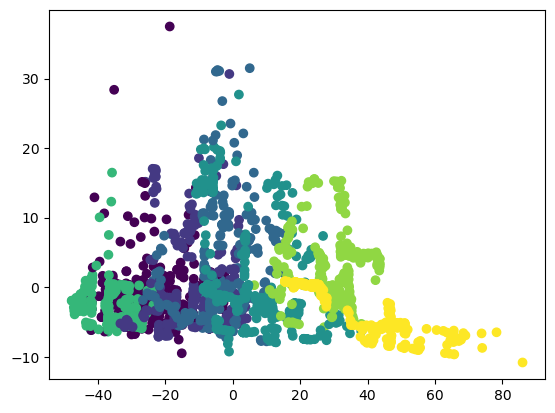

количество классов: 7


In [5]:
pca = PCA(n_components=2).fit(df)
df2d = pca.transform(df)

plt.scatter(df2d[:,0], df2d[:,1], c=level)
plt.show()
print('количество классов:', len(level_count))

Converged after 54 iterations.


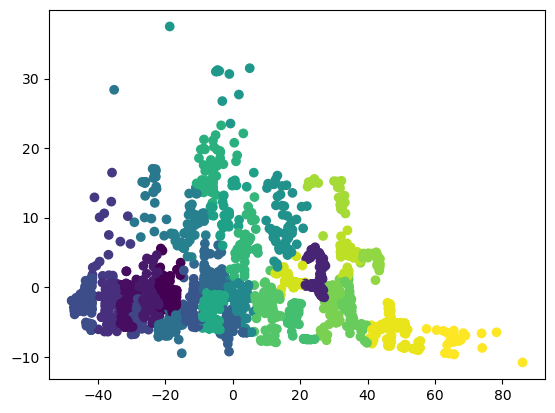

damping = 0.7 ; max_iter= 100 ; convergence_iter= 5 verbose= True 
Количество кластеров: 31 




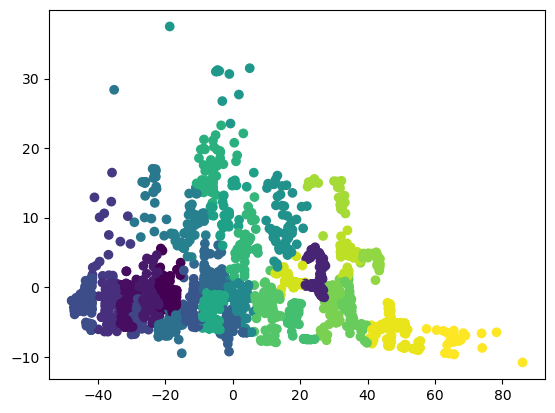

damping = 0.7 ; max_iter= 100 ; convergence_iter= 5 verbose= False 
Количество кластеров: 31 


Converged after 64 iterations.


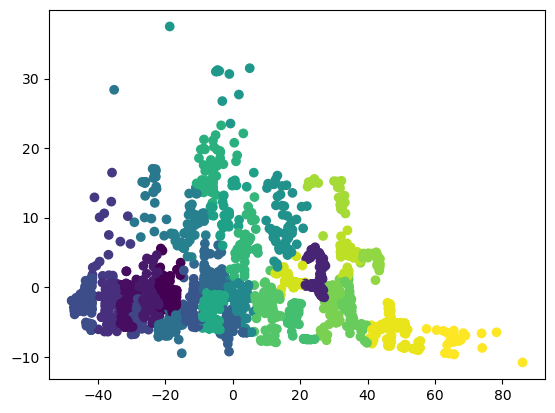

damping = 0.7 ; max_iter= 100 ; convergence_iter= 15 verbose= True 
Количество кластеров: 31 




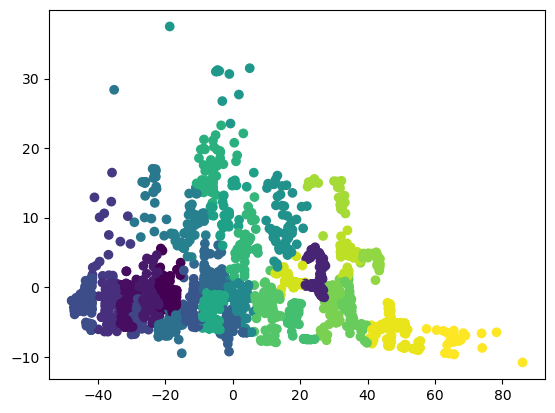

damping = 0.7 ; max_iter= 100 ; convergence_iter= 15 verbose= False 
Количество кластеров: 31 


Converged after 79 iterations.


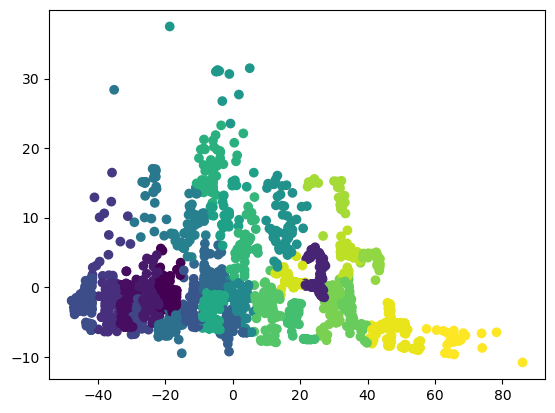

damping = 0.7 ; max_iter= 100 ; convergence_iter= 30 verbose= True 
Количество кластеров: 31 




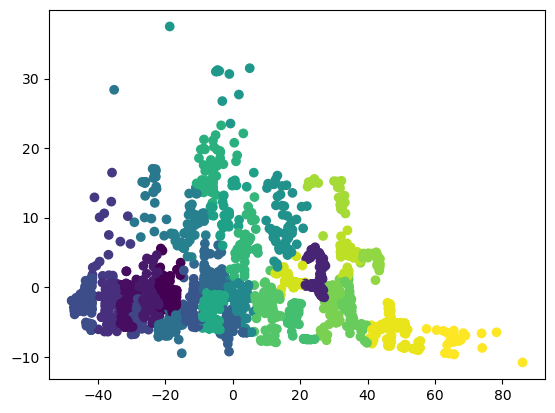

damping = 0.7 ; max_iter= 100 ; convergence_iter= 30 verbose= False 
Количество кластеров: 31 


Converged after 54 iterations.


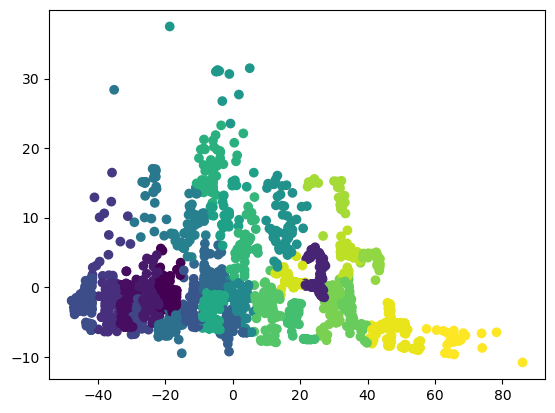

damping = 0.7 ; max_iter= 200 ; convergence_iter= 5 verbose= True 
Количество кластеров: 31 




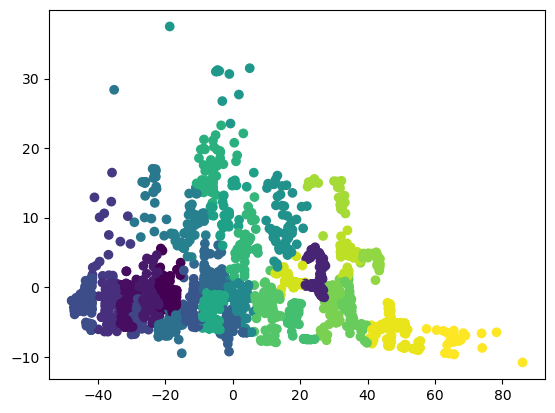

damping = 0.7 ; max_iter= 200 ; convergence_iter= 5 verbose= False 
Количество кластеров: 31 


Converged after 64 iterations.


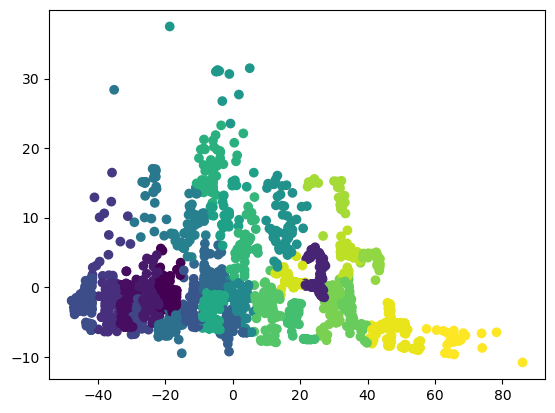

damping = 0.7 ; max_iter= 200 ; convergence_iter= 15 verbose= True 
Количество кластеров: 31 




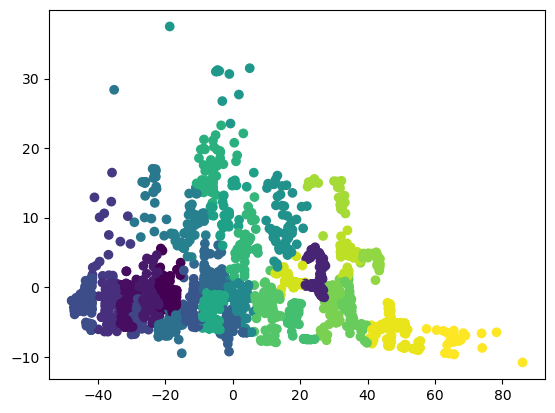

damping = 0.7 ; max_iter= 200 ; convergence_iter= 15 verbose= False 
Количество кластеров: 31 


Converged after 79 iterations.


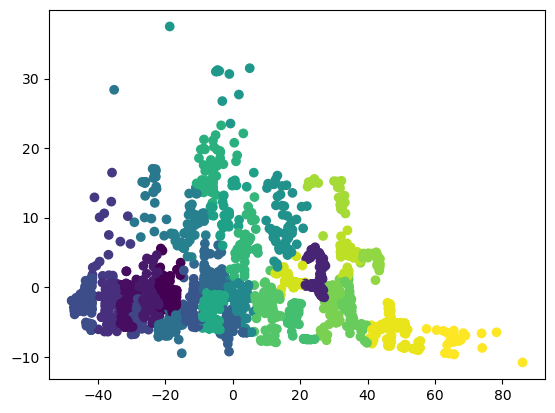

damping = 0.7 ; max_iter= 200 ; convergence_iter= 30 verbose= True 
Количество кластеров: 31 




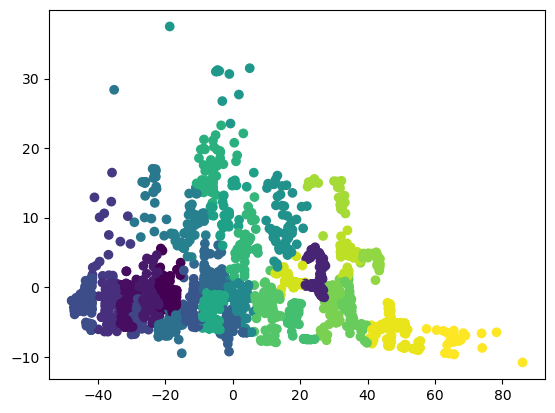

damping = 0.7 ; max_iter= 200 ; convergence_iter= 30 verbose= False 
Количество кластеров: 31 


Converged after 54 iterations.


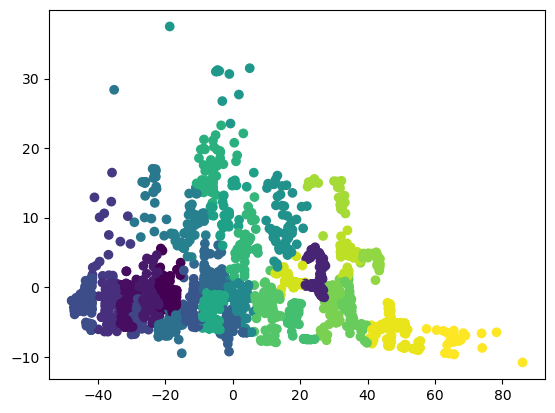

damping = 0.7 ; max_iter= 400 ; convergence_iter= 5 verbose= True 
Количество кластеров: 31 




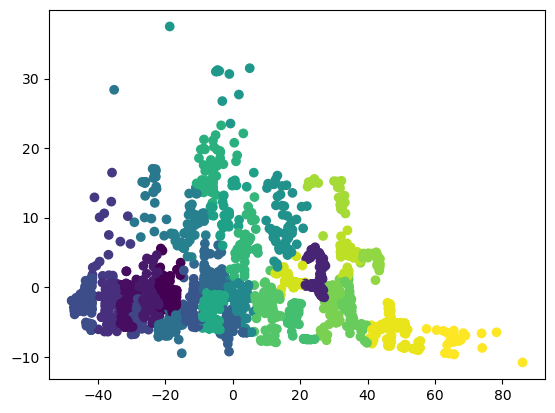

damping = 0.7 ; max_iter= 400 ; convergence_iter= 5 verbose= False 
Количество кластеров: 31 


Converged after 64 iterations.


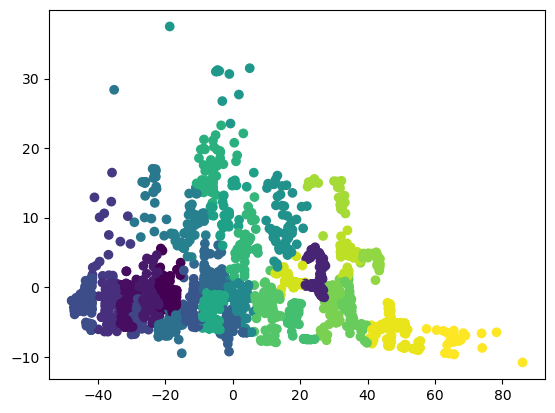

damping = 0.7 ; max_iter= 400 ; convergence_iter= 15 verbose= True 
Количество кластеров: 31 




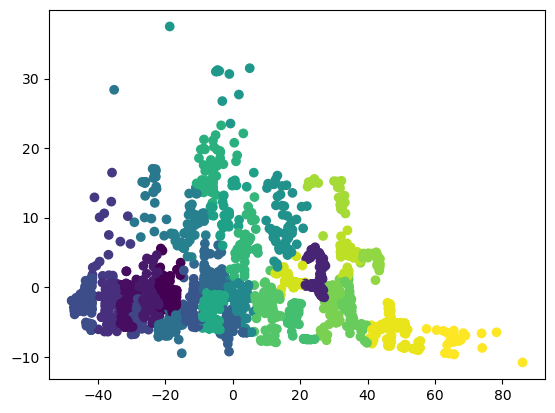

damping = 0.7 ; max_iter= 400 ; convergence_iter= 15 verbose= False 
Количество кластеров: 31 


Converged after 79 iterations.


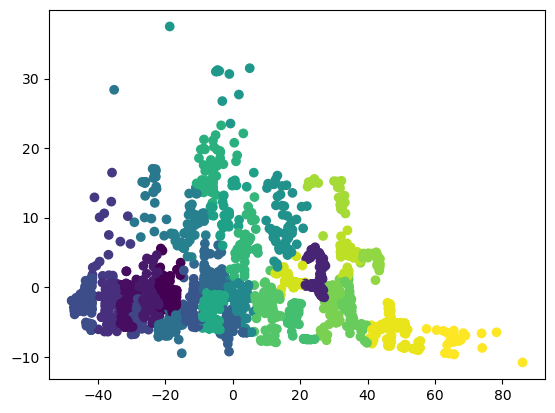

damping = 0.7 ; max_iter= 400 ; convergence_iter= 30 verbose= True 
Количество кластеров: 31 




KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [8]:
damping=[0.7, 0.85,0.99]
max_iter = [100,200,400]
convergence_iter = [5,15,30]
verbose = [True, False ]

for d in damping:
    for mi in max_iter:
        for ci in convergence_iter:
            for v in verbose:
                af = AffinityPropagation(verbose=v,convergence_iter=ci,damping=d, max_iter=mi).fit(df)
                cluster_centers_indices = af.cluster_centers_indices_
                labels = af.labels_
                n_clusters = len(cluster_centers_indices)
                plt.scatter(df2d[:,0], df2d[:,1], c=labels)
                plt.show()
                plt.clf()
                print('damping =',d,'; max_iter=',mi,'; convergence_iter=',ci,'verbose=',v,'\nКоличество кластеров:',n_clusters,'\n\n')